<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

In [1]:
icecreamdata = read.csv("IceCreamData.csv")
N = nrow(icecreamdata)

#Storing temperature and revenue observations as separate objects
temperature = icecreamdata$Temperature
revenue = icecreamdata$Revenue

#Calculating Z-Scores
temperature_Z = (temperature - mean(temperature))/sd(temperature)
revenue_Z = (revenue - mean(revenue))/sd(revenue)

#Correlation formula
q1_R = sum(temperature_Z * revenue_Z)/(N - 1)

# Test statistic
q1_test_stat = (q1_R - 0)/(sqrt((1-q1_R^2)/(N-2)))
round(q1_test_stat, 3)

# Degrees of Freedom
q1_df = N - 2
q1_df

# P value
pt(q1_test_stat, df = q1_df, lower.tail = FALSE)



[1] 155.057

[1] 498

[1] 0

Question 2:


In [2]:
lakedata = read.csv("lake.csv")
NIN = lakedata$NIN
TN = lakedata$TN

N = nrow(lakedata)

#Storing NIN and TN observations as separate objects
NIN = lakedata$NIN
TN = lakedata$TN

#Calculating Z-Scores
NIN_Z = (NIN - mean(NIN))/sd(NIN)
TN_Z = (TN - mean(TN))/sd(TN)

#Correlation formula
q2_R = sum(NIN_Z * TN_Z)/(N - 1)
round(q2_R, 3)

[1] 0.07

Question 3:

In [3]:
# slope
q3_slope = q2_R * (sd(TN) / sd(NIN))
round(q3_slope, 3)

#Intercept
q3_intercept = mean(TN) - q3_slope * mean(NIN)
round(q3_intercept, 3)

# the formula 
# Y = 1.868 + 0.012X

[1] 0.012

[1] 1.868

Question 4:


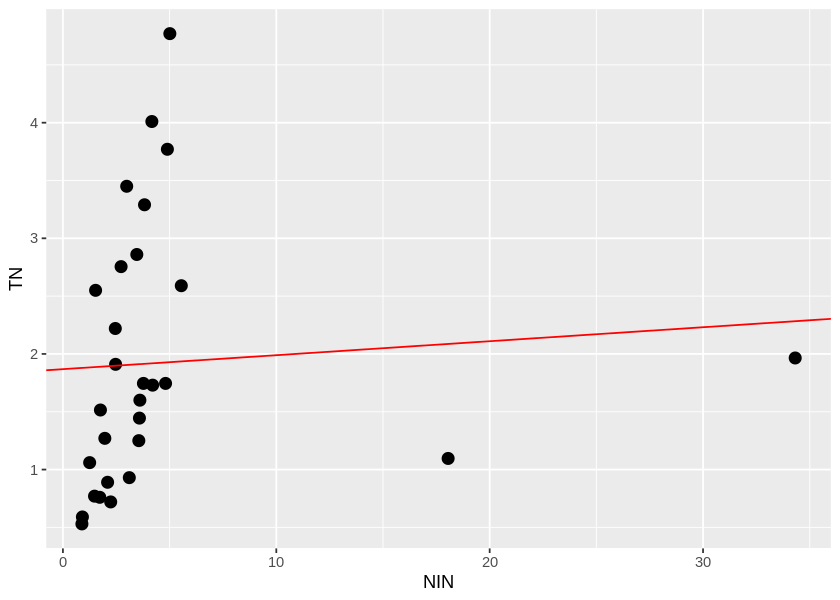

In [4]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(lakedata, aes(x = NIN, y = TN)) +
  geom_point(size = 3) + geom_abline(intercept = q3_intercept, slope = q3_slope, color = "red")


Question 5:


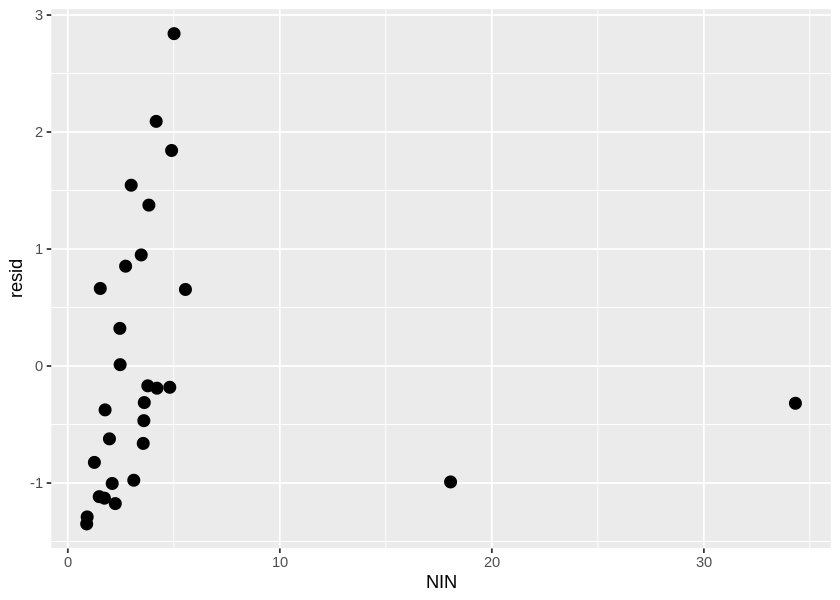

In [5]:
# Model Predictions
lakedata$y_hat = q3_intercept + q3_slope * NIN

# Residuals
lakedata$resid = TN - lakedata$y_hat

ggplot(lakedata, aes(x = NIN, y=resid)) +
  geom_point(size = 3)

Question 6:

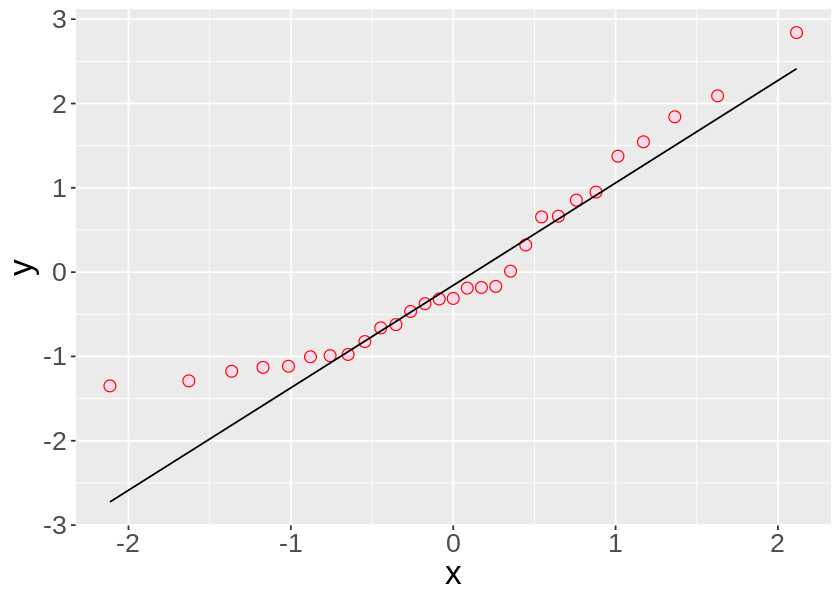

In [6]:
library(ggplot2)
ggplot(lakedata, aes(sample = resid)) +
  stat_qq(shape = 21, size = 3,
             fill = "#F7DBEC", colour = "red", stroke = .5) +
  theme(text = element_text(size = 20)) + stat_qq_line(color = "black" )
# no the residuals are not normally

Question 7:

In [7]:
y_hat = lakedata$y_hat

# squared standard error of the residuals
SQ_SE = sum((TN - y_hat)^2)/(N-2)

# sum of squares
SS_x = sum((NIN - mean(NIN))^2)

# Slope Standard Error
Sb1 = sqrt(SQ_SE / SS_x)

# Intercept Standard Error
Sb0 = sqrt((SQ_SE * sum(NIN ^ 2)) / (N * SS_x))

# test stat
B = 0
q7test_stat = (q3_slope - B) / Sb1

# degrees of freedon
q7df = N - 2

# P value
q7_pval = pt(q7test_stat, df = q7df, lower.tail = FALSE) * 2

# Critical T
alpha = 0.05
q7tcrit = qt(alpha/2, df = q7df, lower.tail = FALSE)

# Confidence Interval
q7lower = q3_slope - q7tcrit * Sb1
q7upper = q3_slope + q7tcrit * Sb1

round(q7test_stat, 3)
round(q7_pval, 3)
round(q7lower, 3)
round(q7upper, 3)

# it is not significantly different

[1] 0.364

[1] 0.719

[1] -0.056

[1] 0.08

Question 8:

In [8]:
lakedata$outties = abs(NIN - median(NIN)) / mad(NIN) > 2.24

outliers = subset(lakedata, outties == TRUE)
outliers

,NIN,TN,TW,y_hat,resid,outties
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
10,18.053,1.096,2.899,2.086664,-0.9906636,TRUE
23,34.319,1.965,1.499,2.283262,-0.3182619,TRUE


Question 9:

In [9]:
not_outliers = subset(lakedata, outties == FALSE)
non_out_NIN = not_outliers$NIN
non_out_TN = not_outliers$TN

lm(non_out_TN ~ non_out_NIN, data = not_outliers)

# Y = 0.287 + 0.562X


Call:
lm(formula = non_out_TN ~ non_out_NIN, data = not_outliers)

Coefficients:
(Intercept)  non_out_NIN  
     0.2867       0.5620  


Question 10:

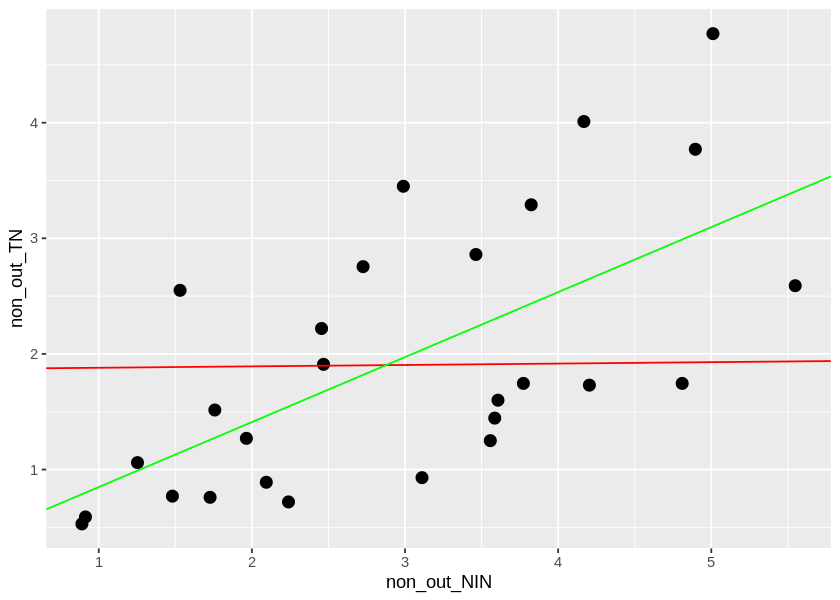

In [10]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(not_outliers, aes(x = non_out_NIN, y = non_out_TN)) +
  geom_point(size = 3)  +

  geom_abline(intercept = q3_intercept, slope = q3_slope, color = "red") +
    
    geom_abline(intercept = 0.2867, slope = 0.5620, color = "green")

Question 11:


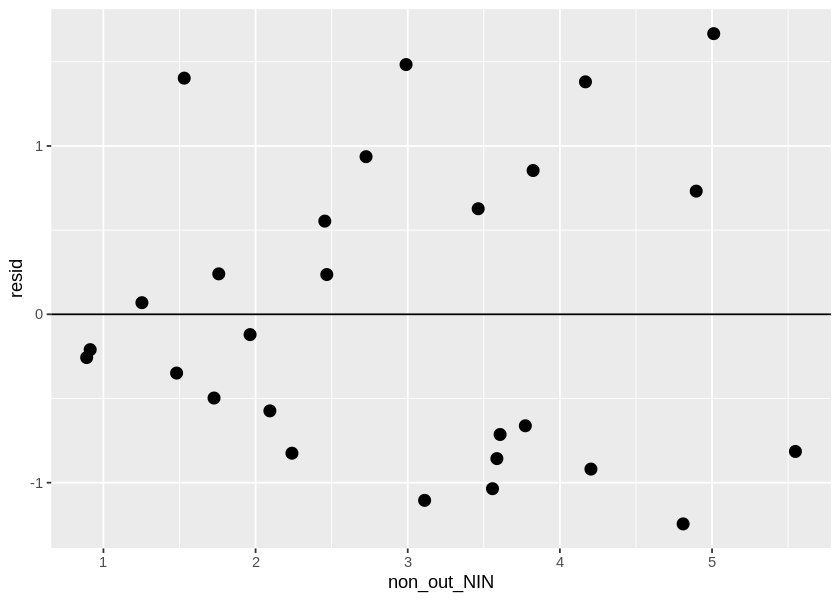

In [11]:
# Scatter plot

# Model Predictions
not_outliers$y_hat = 0.2867 + 0.5620 * non_out_NIN

# Residuals
not_outliers$resid = non_out_TN - not_outliers$y_hat

ggplot(not_outliers, aes(x = non_out_NIN, y=resid)) +
  geom_point(size = 3) + geom_hline(yintercept = 0)

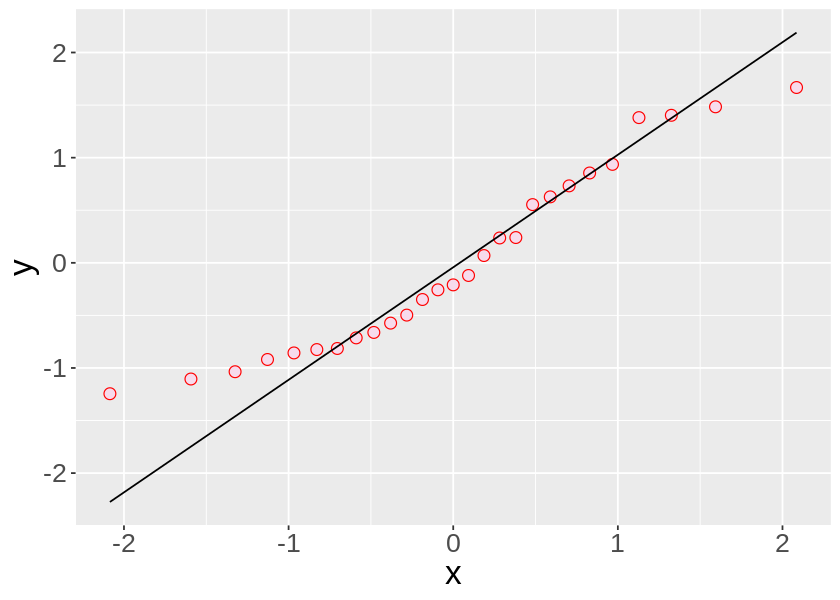

In [12]:
# QQPLOT

library(ggplot2)
ggplot(not_outliers, aes(sample = resid)) +
  stat_qq(shape = 21, size = 3,
             fill = "#F7DBEC", colour = "red", stroke = .5) +
  theme(text = element_text(size = 20)) + stat_qq_line(color = "black" )

Question 12:

In [14]:
TW = lakedata$TW

lakedata$TW_outties = abs(TW - median(TW)) / mad(TW) > 2.24

q12_outliers = subset(lakedata, TW_outties == TRUE)
q12_outliers

,NIN,TN,TW,y_hat,resid,outties,TW_outties
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
2,4.896,3.770,2.499,1.927642,1.8423580,FALSE,TRUE
4,3.586,1.445,1.699,1.911809,-0.4668088,FALSE,TRUE
8,3.557,1.250,1.699,1.911458,-0.6614583,FALSE,TRUE
10,18.053,1.096,2.899,2.086664,-0.9906636,TRUE,TRUE
22,4.810,1.745,3.400,1.926603,-0.1816026,FALSE,TRUE
23,34.319,1.965,1.499,2.283262,-0.3182619,TRUE,TRUE


Question 13:



In [28]:
q13_not_outliers = subset(lakedata, TW_outties == FALSE)
q13_non_out_NIN = q13_not_outliers$NIN
q13_non_out_TN = q13_not_outliers$TN
q13_non_out_TW = q13_not_outliers$TW

mod1 = lm(q13_non_out_TN ~ q13_non_out_NIN, data = q13_not_outliers)
mod1
# Y = 0.199 + 0.632X
mod2 = lm(q13_non_out_TN ~ q13_non_out_NIN + q13_non_out_TW, data = q13_not_outliers)
mod2
# Y = 0.649 + 0.583X + (-0.988X)



Call:
lm(formula = q13_non_out_TN ~ q13_non_out_NIN, data = q13_not_outliers)

Coefficients:
    (Intercept)  q13_non_out_NIN  
         0.1985           0.6321  



Call:
lm(formula = q13_non_out_TN ~ q13_non_out_NIN + q13_non_out_TW, 
    data = q13_not_outliers)

Coefficients:
    (Intercept)  q13_non_out_NIN   q13_non_out_TW  
         0.6489           0.5832          -0.9883  


Question 14:



In [21]:
# Model Predictions
q13_not_outliers$y_hat = 0.1985 + 0.6321 * q13_non_out_NIN

# Residuals
q13_not_outliers$resid = q13_non_out_TN - q13_not_outliers$y_hat

In [25]:
q14N = nrow(q13_not_outliers)

# squared standard error of the residuals
q14_SQ_SE = sum((q13_non_out_TN - q13_not_outliers$y_hat)^2)/(q14N-2)

# sum of squares
q14_SS_x = sum((q13_non_out_NIN - mean(q13_non_out_NIN))^2)

# Slope Standard Error
q14_Sb1 = sqrt(q14_SQ_SE / q14_SS_x)

# Intercept Standard Error
q14_Sb0 = sqrt((q14_SQ_SE * sum(q13_non_out_NIN ^ 2)) / (q14N * q14_SS_x))

# test stat
q14B = 0
q14test_stat = (0.6321 - q14B) / q14_Sb1

# degrees of freedon
q14df = q14N - 2

# P value
q14_pval = pt(q14test_stat, df = q14df, lower.tail = FALSE) * 2

# Critical T
alpha = 0.05
q14tcrit = qt(alpha/2, df = q14df, lower.tail = FALSE)

# Confidence Interval
q14lower = 0.6321 - q14tcrit * q14_Sb1
q14upper = 0.6321 + q14tcrit * q14_Sb1

round(q14_pval, 3)
round(q14lower, 3)
round(q14upper, 3)

[1] 0

[1] 0.331

[1] 0.933

Question 15:

In [26]:
summary(lm(q13_non_out_TN ~ q13_non_out_NIN + q13_non_out_TW, data = q13_not_outliers))


Call:
lm(formula = q13_non_out_TN ~ q13_non_out_NIN + q13_non_out_TW, 
    data = q13_not_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1589 -0.6921 -0.1515  0.7573  1.3940 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.6489     0.5913   1.097 0.285495    
q13_non_out_NIN   0.5832     0.1504   3.877 0.000937 ***
q13_non_out_TW   -0.9883     0.8788  -1.125 0.274096    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8682 on 20 degrees of freedom
Multiple R-squared:  0.5067,	Adjusted R-squared:  0.4574 
F-statistic: 10.27 on 2 and 20 DF,  p-value: 0.0008529


Question 16:

In [27]:
mod2sum = summary(lm(q13_non_out_TN ~ q13_non_out_NIN + q13_non_out_TW, data = q13_not_outliers))
mod1sum = summary(lm(q13_non_out_TN ~ q13_non_out_NIN, data = q13_not_outliers))
q16N = nrow(q13_not_outliers)
p_mod2 = 2
p_diff = 2 - 1
Rsq_diff = mod2sum$r.squared - mod1sum$r.squared
f_diff = ((q16N - p_mod2 - 1) / p_diff) * (Rsq_diff / (1 - mod2sum$r.squared))
round(f_diff,3)
df1 = p_diff
df1
df2 = q16N - p_mod2 - 1
df2
q16pval = pf(f_diff, df1, df2, lower.tail = FALSE) 
round(q16pval,3)

[1] 1.265

[1] 1

[1] 20

[1] 0.274

Question 17:

In [31]:
mod2sum


Call:
lm(formula = q13_non_out_TN ~ q13_non_out_NIN + q13_non_out_TW, 
    data = q13_not_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1589 -0.6921 -0.1515  0.7573  1.3940 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.6489     0.5913   1.097 0.285495    
q13_non_out_NIN   0.5832     0.1504   3.877 0.000937 ***
q13_non_out_TW   -0.9883     0.8788  -1.125 0.274096    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8682 on 20 degrees of freedom
Multiple R-squared:  0.5067,	Adjusted R-squared:  0.4574 
F-statistic: 10.27 on 2 and 20 DF,  p-value: 0.0008529


In [34]:

q17Y = mod2sum$coefficients[2] * (5.7) + mod2sum$coefficients[3] * (0.98)
round(q17Y, 3)


[1] 2.356